In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

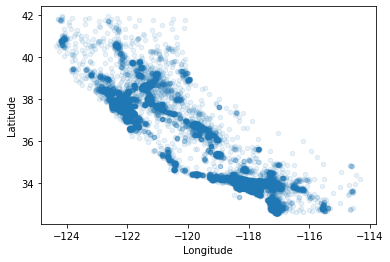

In [6]:
df.plot(kind="scatter",x="Longitude",y="Latitude",alpha=0.1)

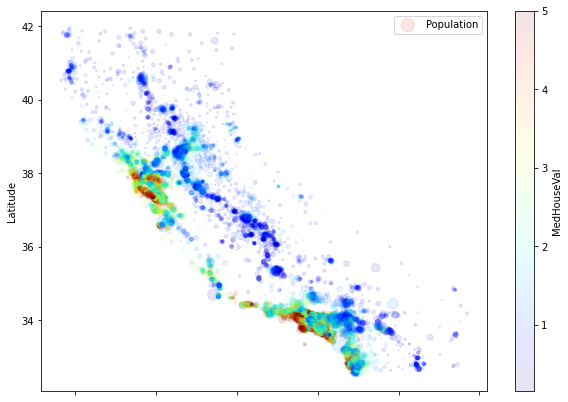

In [7]:
df.plot(kind="scatter",x="Longitude",y="Latitude",alpha=0.1,
            s=df["Population"]/100, label="Population",c="MedHouseVal", 
        figsize=(10,7),cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

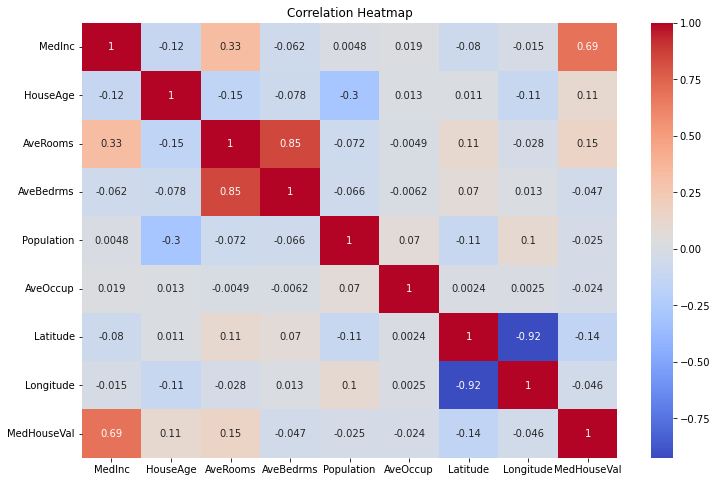

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
corr=df.corr()
corr["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

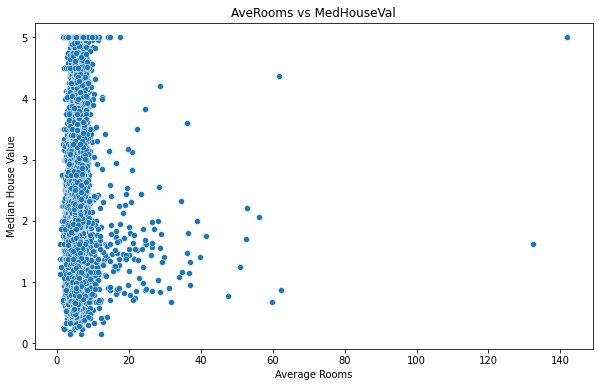

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df)
plt.title("AveRooms vs MedHouseVal")
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.show()

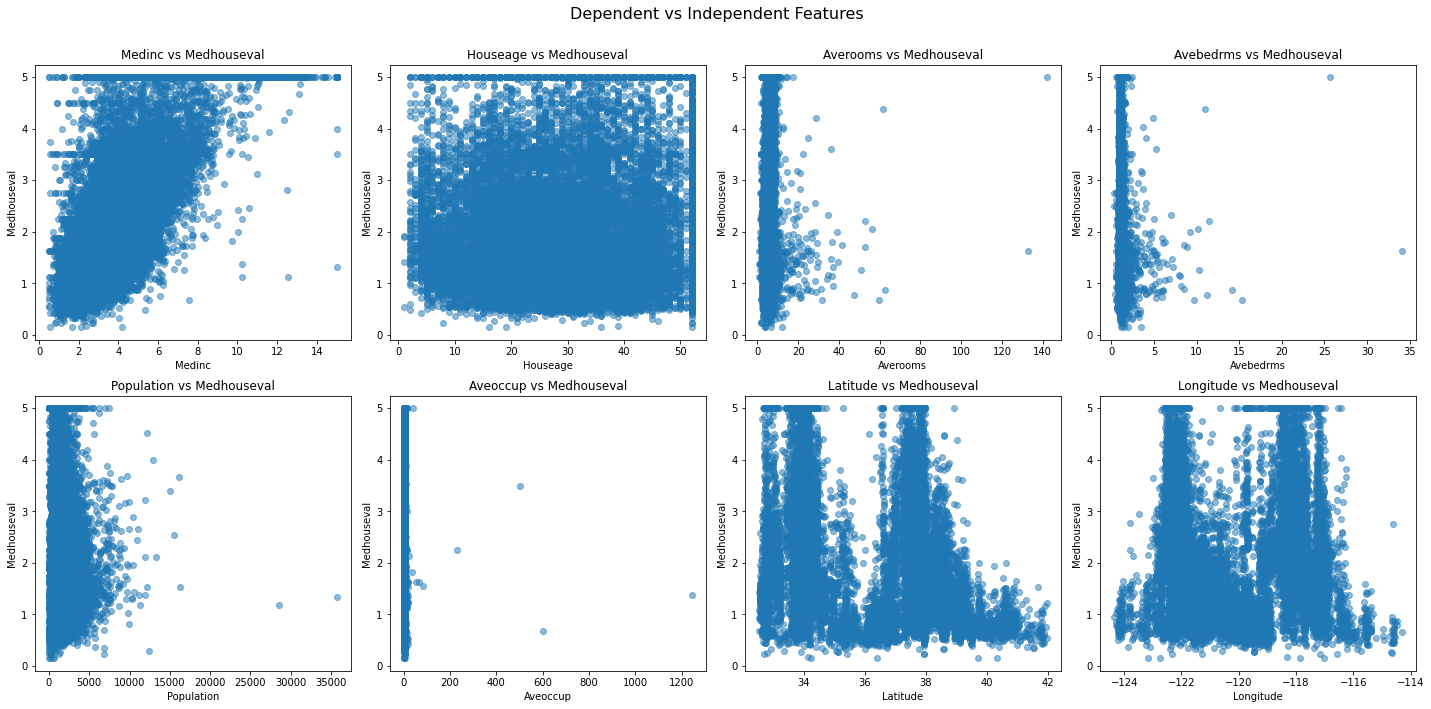

In [11]:
# Set up subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Dependent vs Independent Features", fontsize=16)

# Scatter plots for each independent feature
scatter_features = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
    'Population', 'AveOccup', 'Latitude', 'Longitude'
]

dependent_feature = 'MedHouseVal'

for idx, feature in enumerate(scatter_features):
    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    
    ax.scatter(df[feature], df[dependent_feature], alpha=0.5)
    ax.set_title(f"{feature.capitalize()} vs {dependent_feature.capitalize()}")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel(dependent_feature.capitalize())

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()


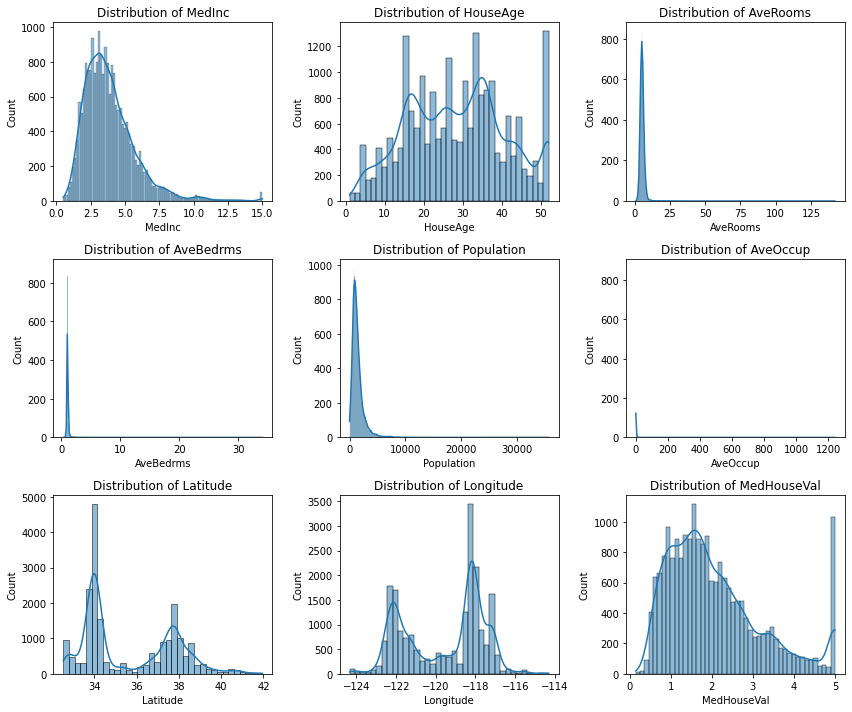

In [12]:
# Visualize feature distributions
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [13]:
pd.DataFrame(df.isna().sum().sort_values(ascending=False),columns=['Null Values'])

,Null Values
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [14]:
# Remove rows with null values
df.dropna(inplace=True)

In [15]:
numerical_features=df.select_dtypes(include=[np.number])
print(f'this dataset have {numerical_features.shape[1]} numerical features :')
numerical_features.dtypes

this dataset have 9 numerical features :


MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

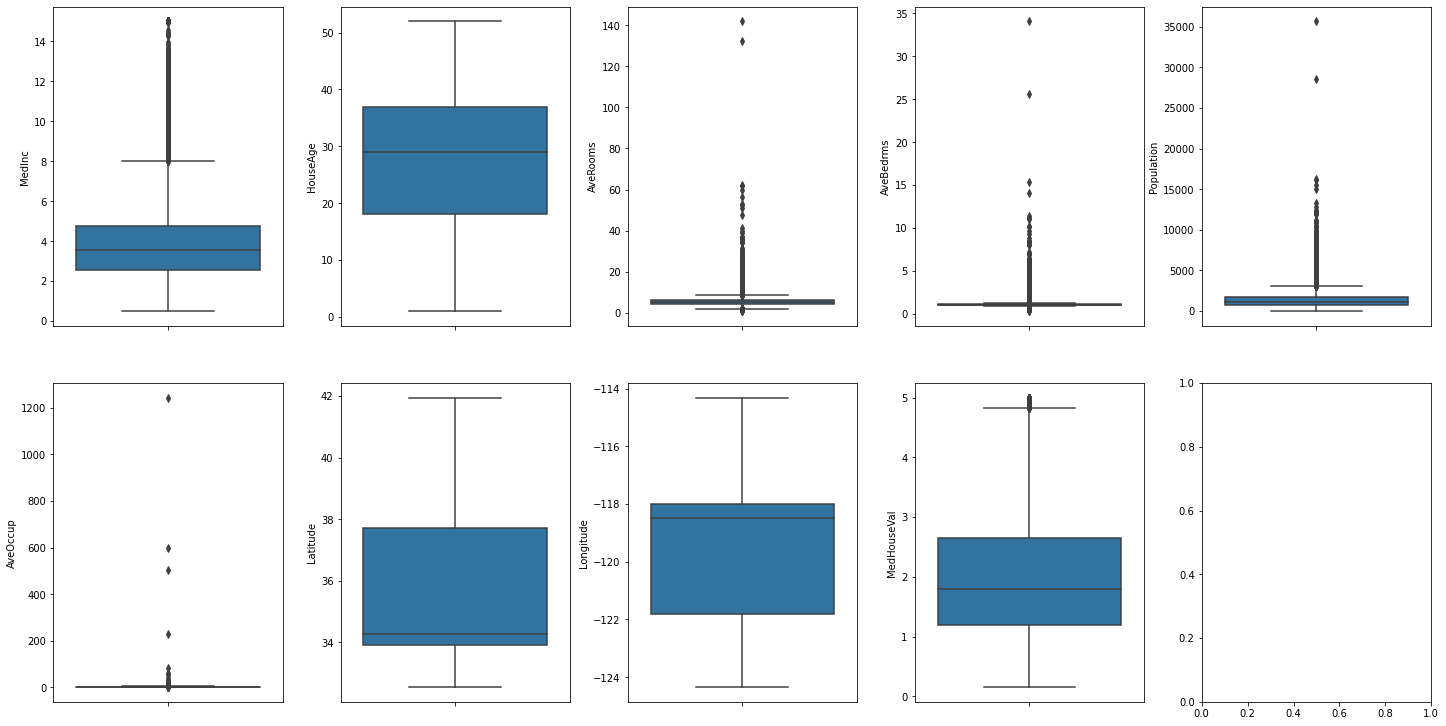

In [16]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in numerical_features.items():
    sns.boxplot(y=k, data=numerical_features, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [17]:
def outliers_handling(column,name):
    outlier=[]
    q1 = np.percentile(column , 1)
    q3 = np.percentile(column , 99)
    for i in column:
        if i > q3 or i < q1:
            outlier.append(i)
            df.drop(df[column==i].index,inplace=True)
    print("Outliers:",name,len(outlier))
    outlier.clear()
for i in df.columns:
    outliers_handling(df[i],i)

C:\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Outliers: MedInc 414
Outliers: HouseAge 122
Outliers: AveRooms 404
Outliers: AveBedrms 394
Outliers: Population 385
Outliers: AveOccup 380
Outliers: Latitude 365
Outliers: Longitude 359
Outliers: MedHouseVal 179


In [18]:
# Data Preprocessing
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

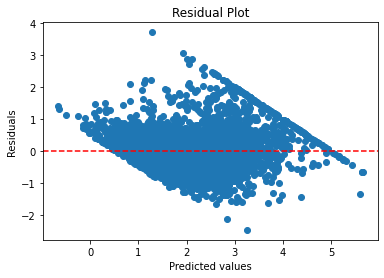

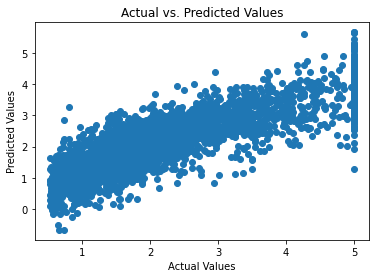

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred_linear = model.predict(X_test)

# Calculate residuals

residuals = y_test - y_pred_linear

# Visualize residuals
plt.scatter(y_pred_linear, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# Visualize actual vs. predicted
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [20]:
def calculate_metrics(y_test, y_pred):
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    return mse, mae, rmse

In [21]:
MSE_linear,MAE_linear,RMSE_linear = calculate_metrics(y_test, y_pred_linear)
MSE_linear = MSE_linear.item()
MAE_linear = MAE_linear.item()
RMSE_linear = RMSE_linear.item()
# Create a DataFrame
linear_metrics_df = pd.DataFrame(data=[MSE_linear,MAE_linear,RMSE_linear],index=["MSE","MAE","RMSE"],columns=["LinearRegression"])
linear_metrics_df

,LinearRegression
MSE,0.404394
MAE,0.473042
RMSE,0.635919


In [22]:
import numpy as np

class RidgeRegression:
    def __init__(self, alpha=1):
        self.alpha = alpha
    
    def fit(self, X, y):
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        n_features = X_with_intercept.shape[1]
        
        # Compute the regularized covariance matrix
        cov_matrix = X_with_intercept.T @ X_with_intercept + self.alpha * np.eye(n_features)
        
        # Compute the regularized cross-product of X and y
        cross_product = X_with_intercept.T @ y
        
        # Solve the linear system to get the coefficients
        self.coefficients = np.linalg.solve(cov_matrix, cross_product)
    
    def predict(self, X):
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        y_pred = X_with_intercept @ self.coefficients
        return y_pred


In [23]:
ridge_model = RidgeRegression(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

MSE_ridge,MAE_ridge,RMSE_ridge = calculate_metrics(y_test, y_pred_ridge)
MSE_ridge = MSE_ridge.item()
MAE_ridge = MAE_ridge.item()
RMSE_ridge = RMSE_ridge.item()
ridge_metrics_df = pd.DataFrame(data=[MSE_ridge,MAE_ridge,RMSE_ridge],index=["MSE","MAE","RMSE"],columns=["RidegRegression"])
all_metrics_df = pd.concat([linear_metrics_df, ridge_metrics_df], axis=1)
all_metrics_df

,LinearRegression,RidegRegression
MSE,0.404394,0.405605
MAE,0.473042,0.473819
RMSE,0.635919,0.636871


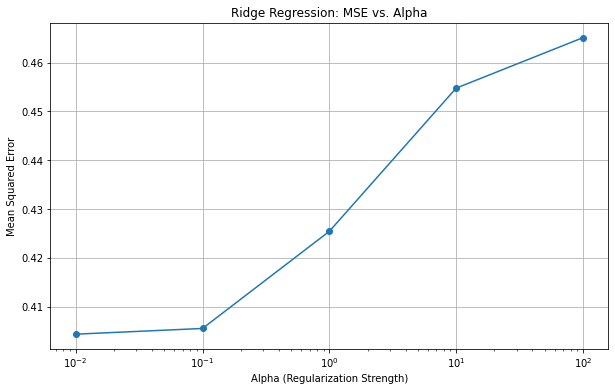

In [24]:
alpha_values = [0.01, 0.1, 1, 10, 100]

# Initialize dictionaries to store results
mse_results = {}
coefficients = {}
# Loop through different alpha values
for alpha in alpha_values:
    ridge_model = RidgeRegression(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_results[alpha] = mse

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(list(mse_results.keys()), list(mse_results.values()), marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: MSE vs. Alpha')
plt.grid(True)
plt.show()


In [37]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
alphas = [0.01, 0.1, 1, 10]  # List of alpha values to test
best_alpha = None
min_mse = float('inf')

for alpha in alphas:
    mse_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        ridge_model= RidgeRegression(alpha=alpha)
        ridge_model.fit(X_train_fold, y_train_fold)
        
        y_pred_fold = ridge_model.predict(X_val_fold)
        mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse_fold)
    avg_mse = np.mean(mse_scores)    
    if avg_mse < min_mse:
        min_mse = avg_mse
        best_alpha = alpha
print("the best alpha is", best_alpha)
ridge_model_CV = RidgeRegression(alpha=0.01)
ridge_model_CV.fit(X_train, y_train)
y_pred_ridge_cv = ridge_model_CV.predict(X_test)
MSE_ridge_cv,MAE_ridge_cv,RMSE_ridge_cv = calculate_metrics(y_test, y_pred_ridge_cv)
MSE_ridge_cv = MSE_ridge_cv.item()
MAE_ridge_cv = MAE_ridge_cv.item()
RMSE_ridge_cv = RMSE_ridge_cv.item()
ridge_CV_metrics_df = pd.DataFrame(data=[MSE_ridge_cv,MAE_ridge_cv,RMSE_ridge_cv],index=["MSE","MAE","RMSE"],columns=['RidgeCV(alpha = {})'.format(best_alpha)])
# Join DataFrames
all_metrics_df = pd.concat([linear_metrics_df,  ridge_CV_metrics_df, ridge_metrics_df,], axis=1)

# Print the combined DataFrame
all_metrics_df

the best alpha is 0.01


,LinearRegression,RidgeCV(alpha = 0.01),RidegRegression
MSE,0.404394,0.404393,0.405605
MAE,0.473042,0.473042,0.473819
RMSE,0.635919,0.635919,0.636871


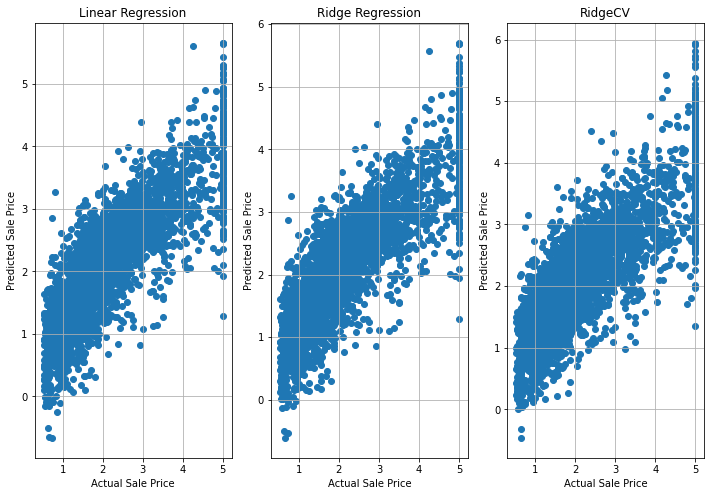

In [26]:
# Scatter plot of predicted values
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, label='Linear Regression')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Linear Regression')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, label = 'Ridge Regression')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Ridge Regression')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge_cv, label='RidgeCV')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('RidgeCV')
plt.grid(True)
